In [7]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
import sys
sys.path.insert(1, f'{curr_dir}')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *

import pdb
import os
import warnings
warnings.filterwarnings("ignore")

In [16]:
results_dir = f'{curr_dir}/results'
#training info

exp = 'aeronaut'
'''
Model predictors
'''
model_arch = 'cornet_z_sl'
model_types = ['random','imagenet_noface', 'imagenet_oneface', 'imagenet_vggface', 'vggface_oneobject', 'vggface']
layer = 'aIT'

'''
Human predictors
'''
rois = ['LO', 'FFA']
rois = ['EVC','LOC','FFA','A1'] + ['lEVC','rEVC','lLOC','rLOC','lFFA','rFFA','lA1','rA1']


predictor_rois = rois
predictor_age = 'adult'



In [9]:
def create_bar(data, x_val, y_val,fill_val, err=0, title_val='None'):

    
    plot = ggplot(data, aes(x = x_val, y = y_val, fill = fill_val)) + \
        geom_col(stat='identity',color = 'black', position='dodge') + theme_classic() + \
        geom_linerange(aes(x=x_val,  ymax = f'{y_val} + {err}', ymin = f'{y_val} - {err}'), size = 1, position=position_dodge(width=.9)) + \
        xlab('ROI') + ylab('Correlation') + \
        theme(text = element_text(color ='black'), 
            axis_text_x= element_text(angle = 30, size = 12),
            axis_text_y= element_text(size = 12),
            axis_title=element_text(size = 14),
            axis_line=element_line(), 
            panel_border=element_blank(),
            figure_size = (10, 5))+ \
            ggtitle(title_val)

    print(plot)

### Model classification accuracy

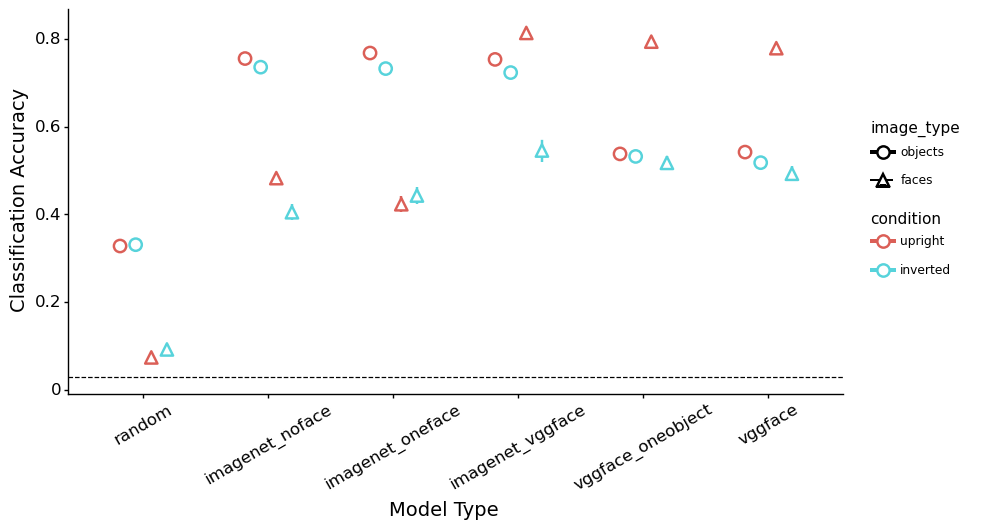

In [9]:
"""
Plot classification mean data
"""
#exp = 'classify'

cond = ['upright','inverted']
test_type = ['objects', 'faces']

suf = ''

summary_df = pd.DataFrame(columns = ['arch','train_type','image_type', 'condition', 'acc', 'se'])
for trt in model_types:
    for tt in test_type:
        for cc in cond:
            
            curr_df = pd.read_csv(f'{results_dir}/classify/{model_arch}_{trt}_avgpool_{tt}_{cc}{suf}.csv')
            curr_data = pd.Series([model_arch,trt,tt,cc, curr_df['acc'].mean(), curr_df['acc'].sem()],
                                    index = summary_df.columns)
            summary_df = summary_df.append(curr_data, ignore_index=True)

    #summary_df = pd.concat([summary_df, curr_data])
summary_df['acc'] = summary_df['acc'].astype(float)
summary_df['se'] = summary_df['se'].astype(float)

summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
summary_df['image_type'] = pd.Categorical(summary_df['image_type'], categories = test_type, ordered = False)
summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = False)


#plot = ggplot(summary_df, aes(x = 'model', y = 'acc', fill = 'image_type')) + geom_col(stat='identity', position='dodge') + \
#     lims(y=(0, .5))
#print([mm[1], ll])
plot = ggplot(summary_df, aes(x = 'train_type', y = 'acc', color = 'condition')) + \
    geom_linerange(aes(x='train_type',  ymax = 'acc + se', ymin = 'acc - se', linetype = 'image_type'), size = 1,position=position_dodge2(width=.5)) + \
    geom_point(aes(shape = 'image_type'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5)) + \
    geom_hline(yintercept=.03, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Classification Accuracy') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            figure_size = (10, 5))

print(plot)
#del plot


### Predict Mean Timecourse across subs

Fit to mean TS for 50% of subs, predict left-out 50%

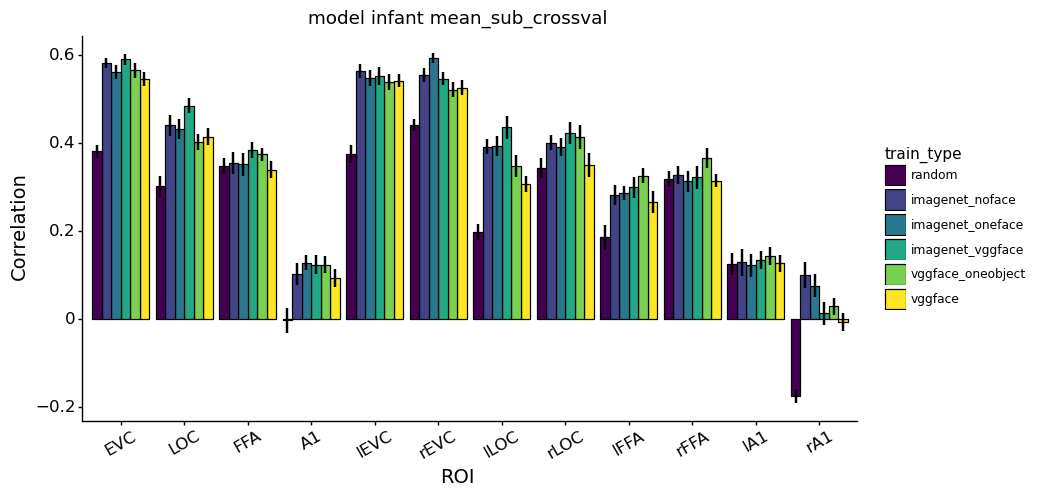

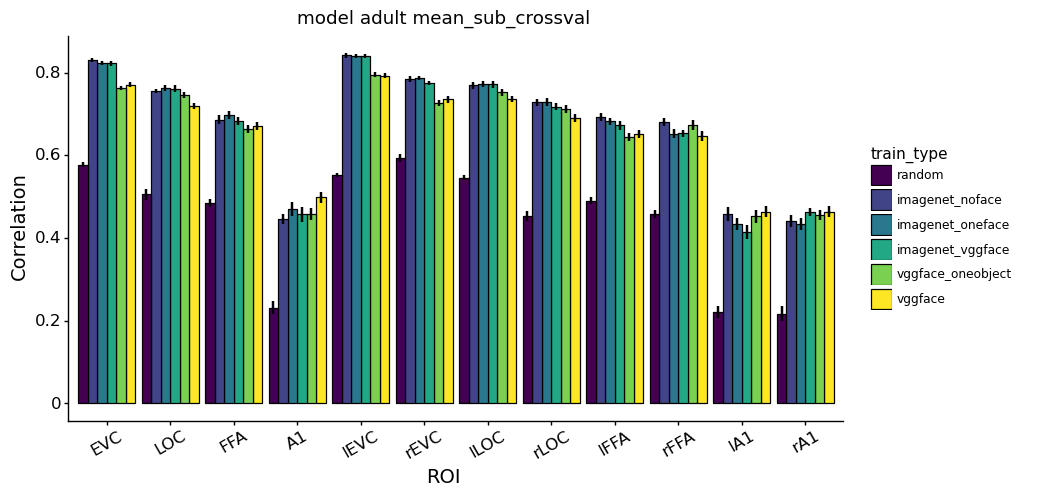

In [17]:
'''
Model summary file
'''
predictor = 'model'
analysis_type = 'mean_sub_crossval'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mean_ts/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
#summary_df = summary_df[summary_df['roi'] != 'lA1']
#summary_df = summary_df[summary_df['roi'] != 'rA1']

summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','train_type', 'se',  f'{predictor} {age} {analysis_type}')


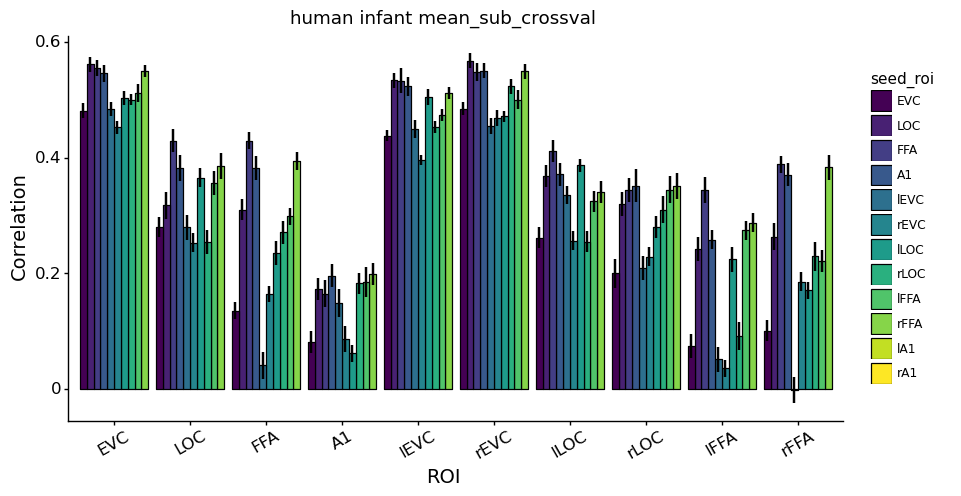

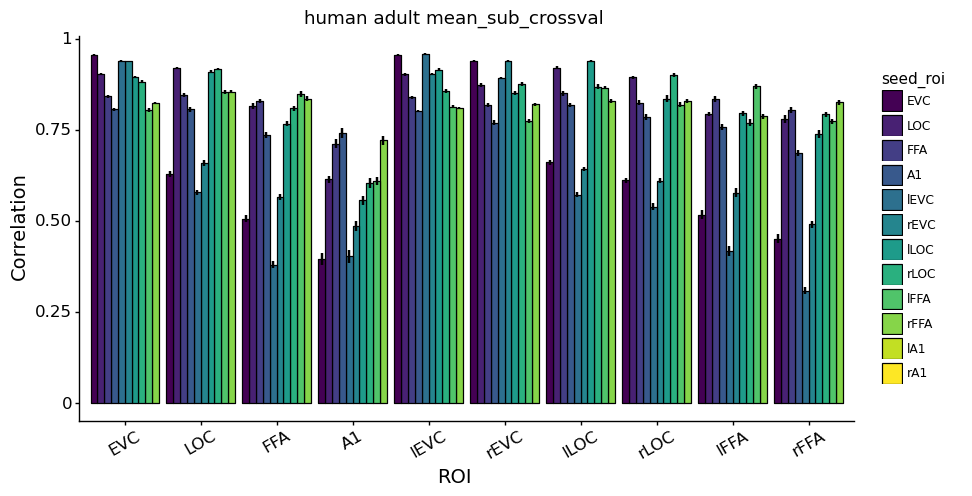

In [19]:
'''
Human summary file
'''
predictor = 'human'
analysis_type = 'mean_sub_crossval'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mean_ts/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[(summary_df['roi'] != 'lA1') & (summary_df['seed_roi'] != 'lA1')]
summary_df = summary_df[(summary_df['roi'] != 'rA1') & (summary_df['seed_roi'] != 'rA1')]



summary_df['seed_roi'] = pd.Categorical(summary_df['seed_roi'], categories = predictor_rois, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','seed_roi', 'se', f'{predictor} {age} {analysis_type}')


##groupby train_type, age, roi
#summary_mean = summary_file.groupby(['train_type','age','roi']).mean().reset_index()


### RSA 

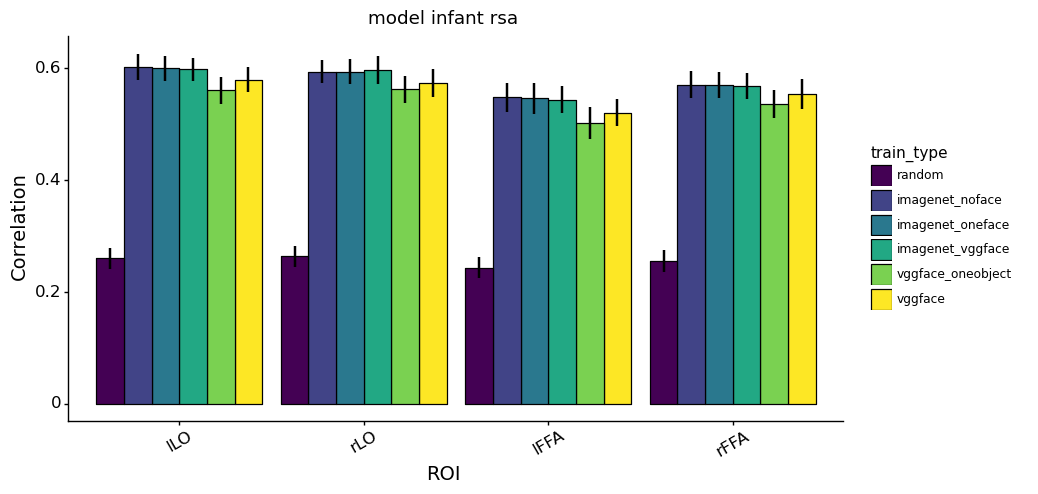

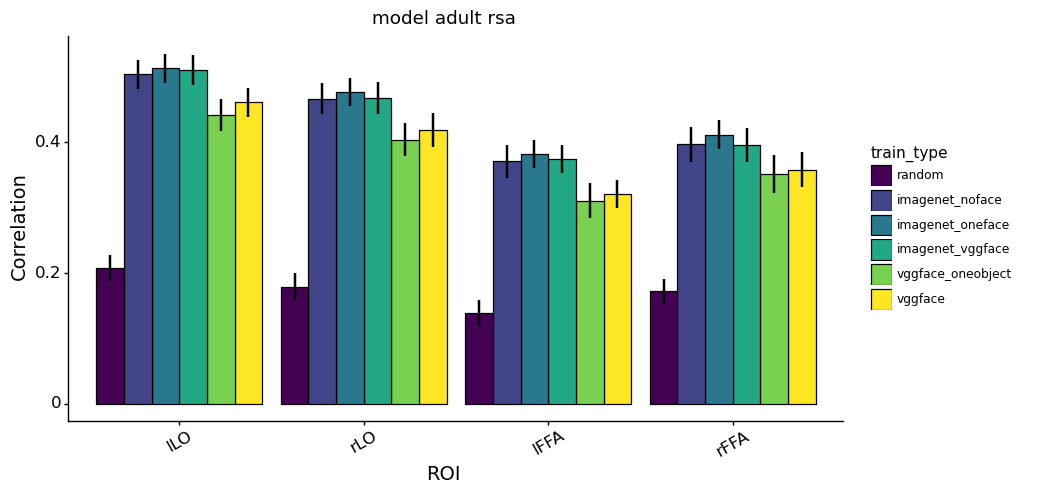

In [7]:
'''
Model summary file
'''
predictor = 'model'
analysis_type = 'rsa'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/rsa/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[summary_df['roi'] != 'lA1']
summary_df = summary_df[summary_df['roi'] != 'rA1']

summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','train_type', 'se',  f'{predictor} {age} {analysis_type}')


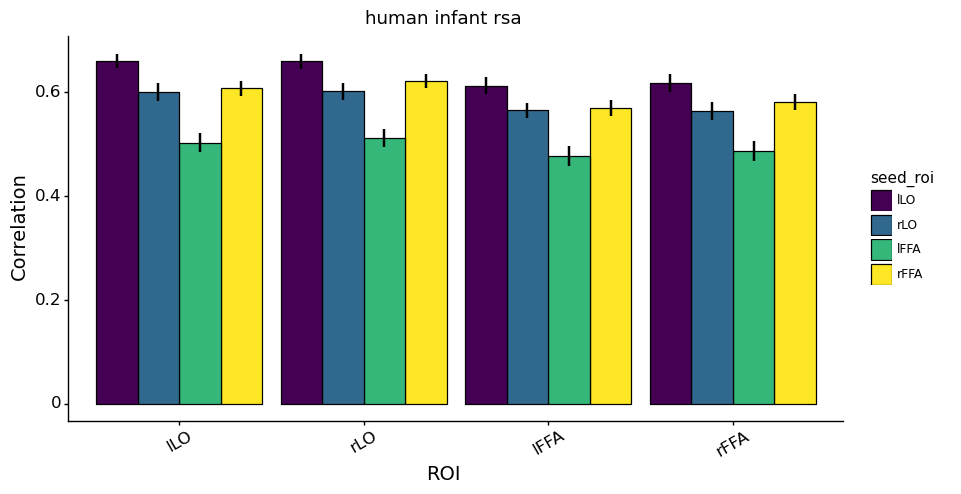

IndexError: arrays used as indices must be of integer (or boolean) type

In [8]:
'''
Human summary file
'''
predictor = 'human'
analysis_type = 'rsa'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/rsa/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[(summary_df['roi'] != 'lA1') & (summary_df['seed_roi'] != 'lA1')]
summary_df = summary_df[(summary_df['roi'] != 'rA1') & (summary_df['seed_roi'] != 'rA1')]



summary_df['seed_roi'] = pd.Categorical(summary_df['seed_roi'], categories = predictor_rois, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','seed_roi', 'se', f'{predictor} {age} {analysis_type}')


##groupby train_type, age, roi
#summary_mean = summary_file.groupby(['train_type','age','roi']).mean().reset_index()


### Predict multivariate timecourse for each sub

Fit  data for half movie in each sub, predict left-out half

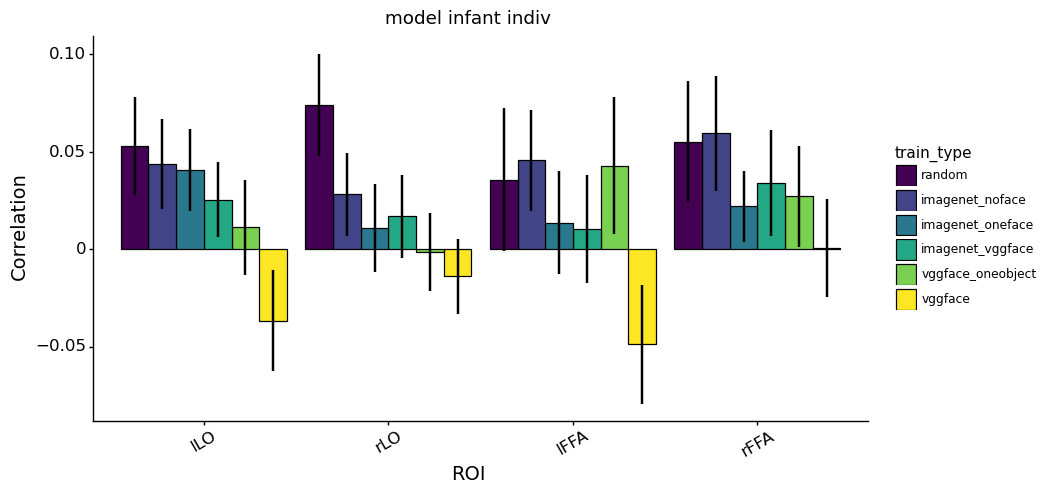

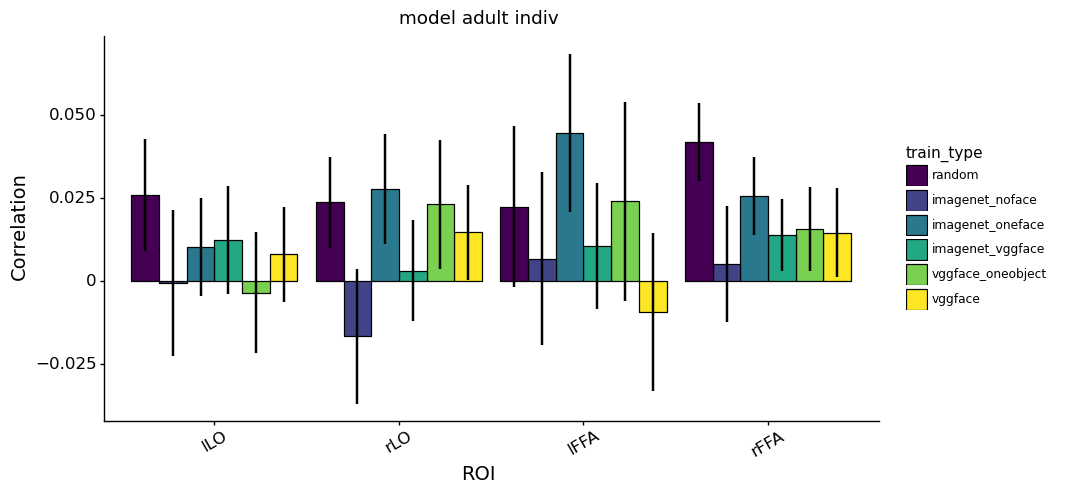

In [16]:
'''
Model summary file
'''
predictor = 'model'
analysis_type = 'indiv'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mvpd/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[summary_df['roi'] != 'lA1']
summary_df = summary_df[summary_df['roi'] != 'rA1']

summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:
    #extract data for each age
    if age == "infant":
        corr_data = summary_df[summary_df['age'] < 18]
    else:
        corr_data = summary_df[summary_df['age'] >= 18]

    corr_mean = corr_data.groupby(['train_type','roi']).mean().reset_index()
    corr_se = corr_data.groupby(['train_type','roi']).sem().reset_index()
    corr_mean['se'] = corr_se['corr']
    #plot corr data as bar graph
    #corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_mean, 'roi', 'corr','train_type', 'se',  f'{predictor} {age} {analysis_type}')


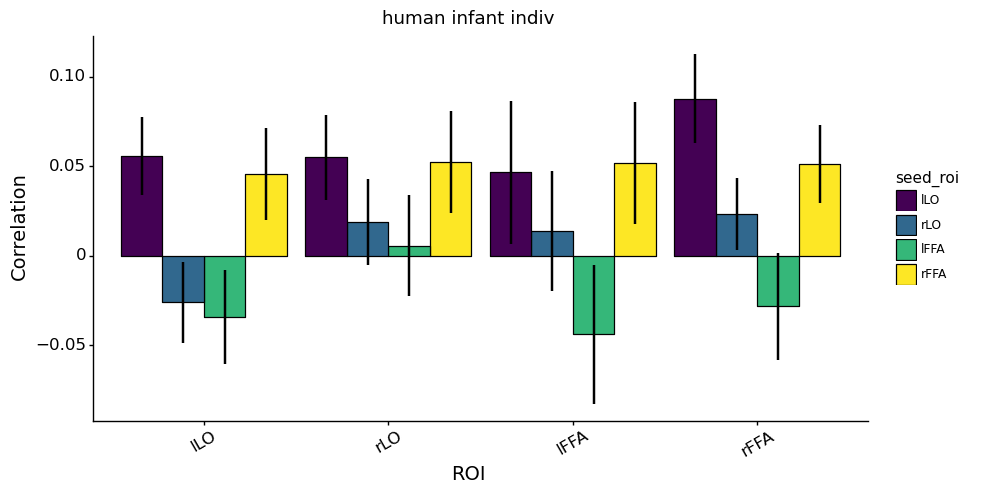

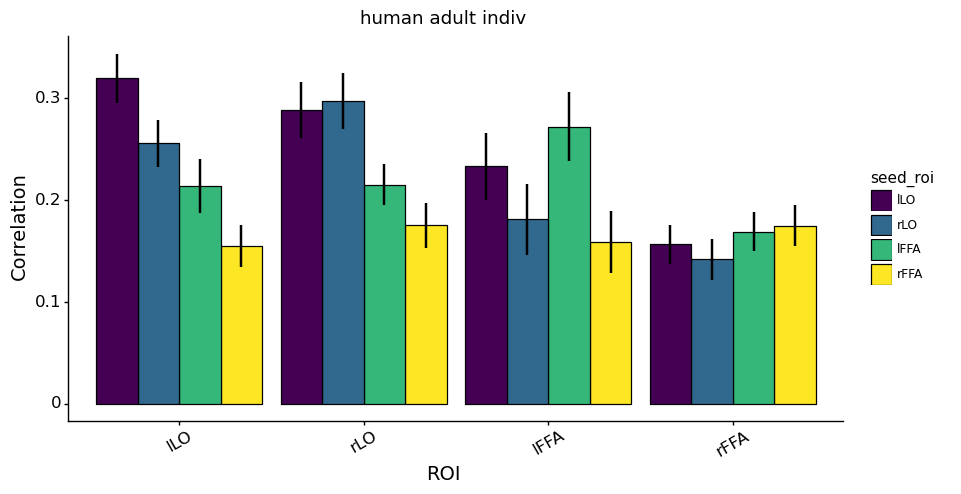

In [18]:
'''
Human summary file
'''
predictor = 'human'
analysis_type = 'indiv'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mvpd/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[(summary_df['roi'] != 'lA1') & (summary_df['seed_roi'] != 'lA1')]
summary_df = summary_df[(summary_df['roi'] != 'rA1') & (summary_df['seed_roi'] != 'rA1')]


summary_df['seed_roi'] = pd.Categorical(summary_df['seed_roi'], categories = predictor_rois, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)

for age in dv_ages:
    #extract data for each age
    if age == "infant":
        corr_data = summary_df[summary_df['age'] < 18]
    else:
        corr_data = summary_df[summary_df['age'] >= 18]

    corr_mean = corr_data.groupby(['seed_roi','roi']).mean().reset_index()
    corr_se = corr_data.groupby(['seed_roi','roi']).sem().reset_index()
    corr_mean['se'] = corr_se['corr']
    #plot corr data as bar graph
    #corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_mean, 'roi', 'corr','seed_roi', 'se',  f'{predictor} {age} {analysis_type}')


### Predict multivariate timecourse for group using SRM

Fit data for half movie SRM of subs, predict left-out half

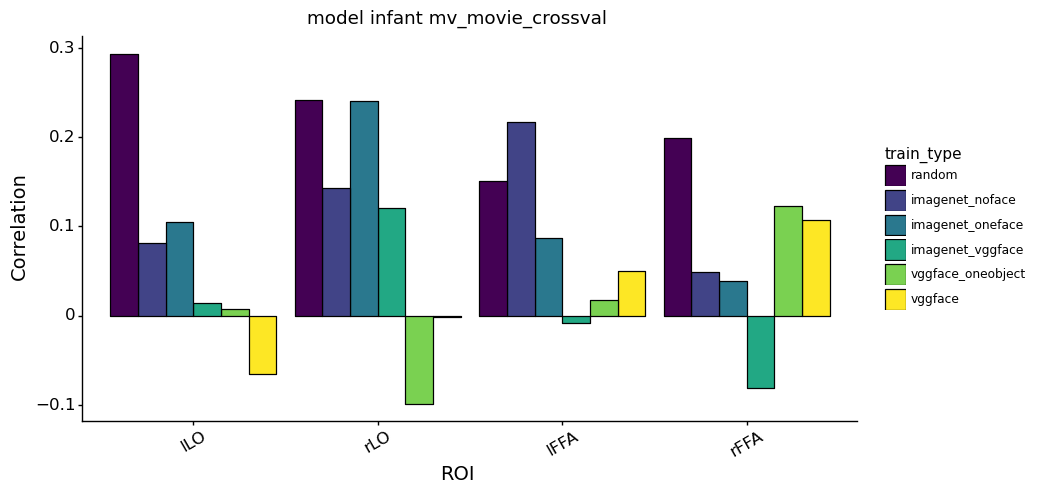

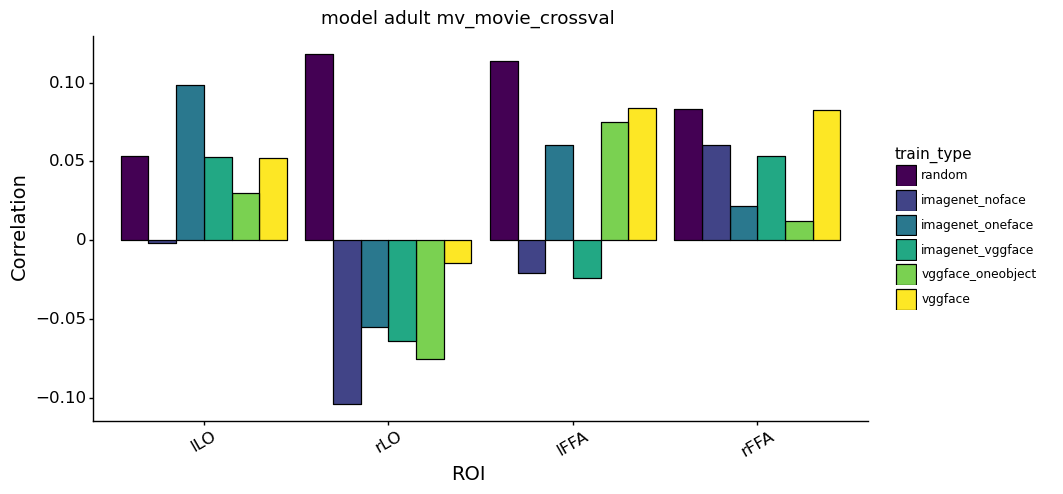

In [23]:
'''
Model summary file
'''
predictor = 'model'
analysis_type = 'mv_movie_crossval'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mvpd/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[summary_df['roi'] != 'lA1']
summary_df = summary_df[summary_df['roi'] != 'rA1']

summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','train_type', 0, f'{predictor} {age} {analysis_type}')


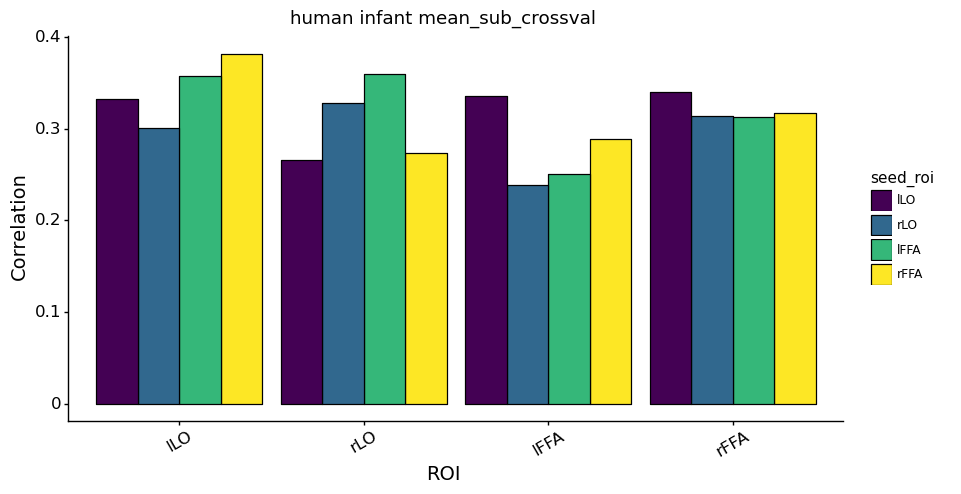

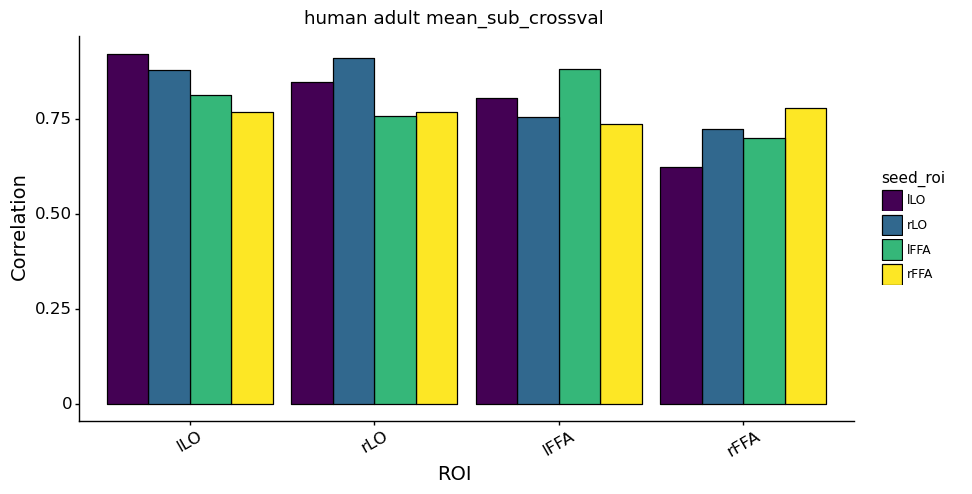

In [24]:
'''
Human summary file
'''
predictor = 'human'
analysis_type = 'mean_sub_crossval'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mvpd/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[(summary_df['roi'] != 'lA1') & (summary_df['seed_roi'] != 'lA1')]
summary_df = summary_df[(summary_df['roi'] != 'rA1') & (summary_df['seed_roi'] != 'rA1')]



summary_df['seed_roi'] = pd.Categorical(summary_df['seed_roi'], categories = predictor_rois, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','seed_roi', 0, f'{predictor} {age} {analysis_type}')


##groupby train_type, age, roi
#summary_mean = summary_file.groupby(['train_type','age','roi']).mean().reset_index()


### Predict multivariate timecourse across subs using SRM

Fit to SRM TS for 50% of subs, predict left-out 50%

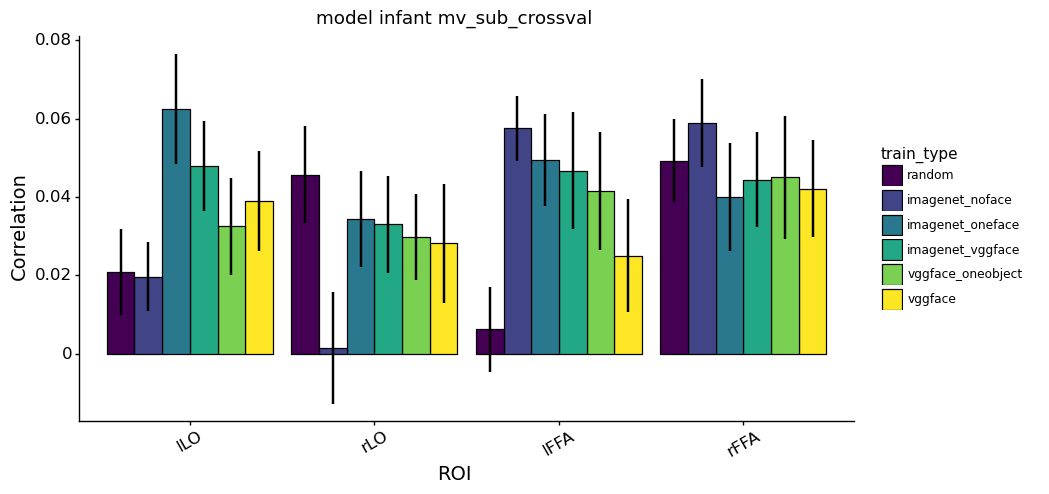

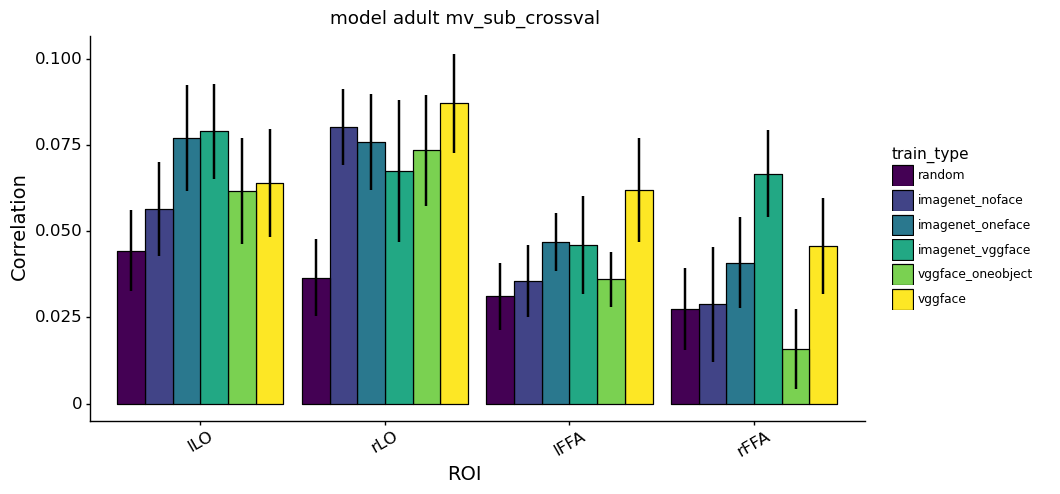

In [6]:
'''
Model summary file
'''
predictor = 'model'
analysis_type = 'mv_sub_crossval'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mvpd/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[summary_df['roi'] != 'lA1']
summary_df = summary_df[summary_df['roi'] != 'rA1']

summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = model_types, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','train_type', 'se',  f'{predictor} {age} {analysis_type}')


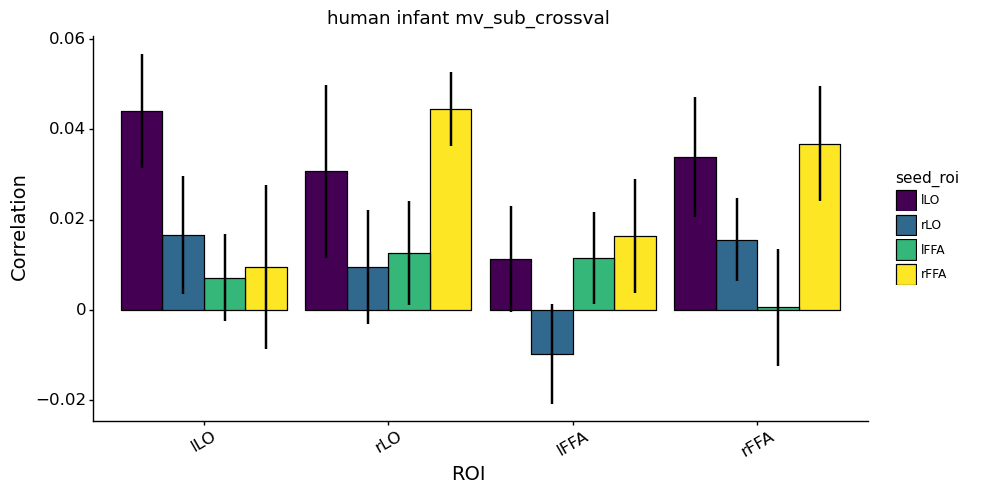

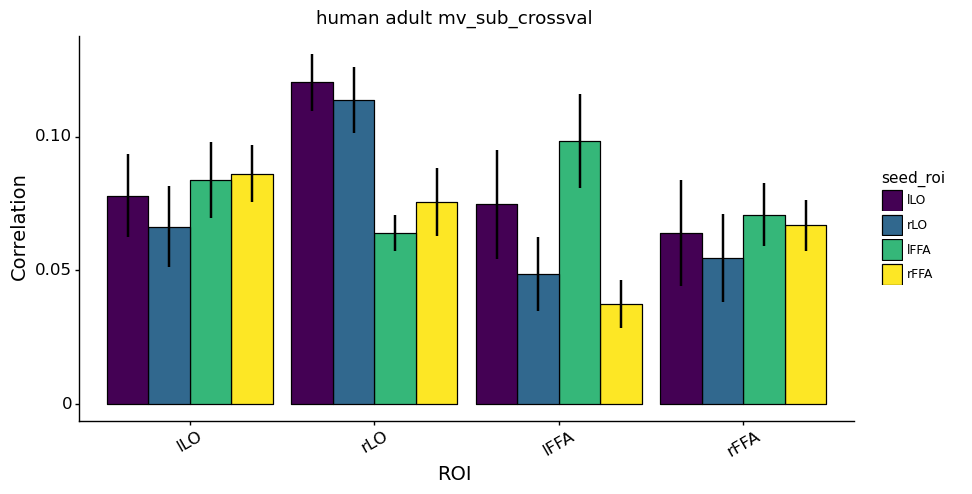

In [7]:
'''
Human summary file
'''
predictor = 'human'
analysis_type = 'mv_sub_crossval'
dv_ages = ['infant','adult']

summary_df = pd.read_csv(f'{results_dir}/mvpd/{exp}_{predictor}_{analysis_type}.csv')
#remove A1 rois from summary file
summary_df = summary_df[(summary_df['roi'] != 'lA1') & (summary_df['seed_roi'] != 'lA1')]
summary_df = summary_df[(summary_df['roi'] != 'rA1') & (summary_df['seed_roi'] != 'rA1')]



summary_df['seed_roi'] = pd.Categorical(summary_df['seed_roi'], categories = predictor_rois, ordered = True)
summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = predictor_rois, ordered = True)


for age in dv_ages:

    #plot corr data as bar graph
    corr_data = summary_df[summary_df['age'] == age]
    create_bar(corr_data, 'roi', 'corr','seed_roi', 'se', f'{predictor} {age} {analysis_type}')


##groupby train_type, age, roi
#summary_mean = summary_file.groupby(['train_type','age','roi']).mean().reset_index()
